<a href="https://colab.research.google.com/github/Dominik-Lamcha/Optimization_algorithms/blob/main/RMS_prop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lib import**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import arange
from numpy import meshgrid
import sympy as smp
import scipy
from scipy.misc import derivative
import datetime
from statistics import mean
import atexit
import time
from time import clock

**Function definitions**

In [ ]:
def rastrigin(*X):
    A = 10
    n=len(X)
    return A*n + sum([(x*x - A * np.cos(2 * math.pi * x)) for x in X])

In [ ]:
def Rastrigin(X):
    A = 10
    return A*len(X) + sum([(x*x - A * math.cos(2 * math.pi * x)) for x in X])

In [ ]:
def Rastrigin_grad(X): 
  grad = []
  for x in X:
    grad.append(2*x+20*math.pi*math.sin(2*math.pi*x))
  return np.array(grad)  

In [ ]:
def sphere(*X):
    return sum([(x*x) for x in X])

In [ ]:
def Sphere(X):
    return sum([(x*x) for x in X])

In [ ]:
def Sphere_grad(X):
  grad = []
  for x in X:
    grad.append(2*x)
  return np.array(grad)  

In [ ]:
def rosenbrock(*X):
   sum=0
   n=len(X)
   for i in range(n-1):
    sum=sum+(100.0*(X[i+1] - X[i]**2.0)**2.0 + ((1 - X[i])**2.0))
   return sum

In [ ]:
def Rosenbrock(X):
   sum=0
   for i in range(len(X)-1):
    sum=sum+(100.0*(X[i+1] - X[i]**2.0)**2.0 + ((1 - X[i])**2.0))
   return sum


In [ ]:
def Rosenbrock_grad(X):  
  grad=[]
  n=len(X)
  x_n=n-1
  for i in range(n-1):
    grad.append(-400*X[i]*(X[i+1]-X[i]**2)+2*X[i]-2)
  grad.append(200*X[x_n]-200*X[x_n-1]**2)
  return np.array(grad)

In [ ]:
def rms_prop(cur_x, gradient, precision, sq_grad_val, max_iters, rate,rho):
  iters = 0 
  previous_step_size =[0.5]
  sq_grad = [0.5]
  eps = 1e-10 

  start_time=time.time()
  sq_grad_avg = np.array([0.0 for _ in range(len(cur_x))])
  sq_grad_avg_sqrt = np.zeros(len(cur_x))

  while max(sq_grad) > max(sq_grad_val) and max(previous_step_size) > precision and iters < max_iters:
      prev_x = cur_x 
      sq_grad = gradient(prev_x)**2
      sq_grad_avg = (sq_grad_avg * rho) + (1 - rho) * sq_grad
      for i in range(len(sq_grad_avg)):
        sq_grad_avg_sqrt[i] = math.sqrt(sq_grad_avg[i])
      alpha = rate / (sq_grad_avg_sqrt+eps)
      cur_x = cur_x - (alpha * gradient(prev_x))
      previous_step_size = abs(cur_x - prev_x) 
      iters = iters+1 
  stop_time=time.time()
  algorythm_time=(stop_time-start_time)

  return algorythm_time, cur_x

**Main**

In [ ]:

rate = 0.0005 
max_iters = 5000 
rho = 0.99
alg_time_1 = [[0]*5 for i in range(11)] 
alg_time_2 = [[0]*5 for i in range(11)]
alg_time_3 = [[0]*5 for i in range(11)]
best_result_1 = [[0] for i in range(11)]
mean_1 = [[0] for i in range(11)]
best_result_x1 = [[0] for i in range(11)]
best_result_2 = [[0] for i in range(11)]
mean_2 = [[0] for i in range(11)]
best_result_x2 = [[0] for i in range(11)]
best_result_3 = [[0] for i in range(11)]
mean_3 = [[0] for i in range(11)]
best_result_x3 = [[0] for i in range(11)]

for xi in range(11):
  xn=2**(xi+1) 
  f1_obj = [] 
  f2_obj = []
  f3_obj = []
  print(xn)
  #print(xi) 
  temp_suma=0

  for i in range(5):
    start_x = np.random.uniform(0,1,xn) 
    time_1 = 0
    time_2 = 0
    time_3 = 0
    x_1 = 0
    x_2 = 0
    x_3 = 0

    sq_grad_Rastrigin=np.array([0.02 for _ in range(len(start_x))])
    sq_grad_Sphere=np.array([0.02 for _ in range(len(start_x))])
    sq_grad_Rosenbrock=np.array([0.02 for _ in range(len(start_x))])

    alg_time_1[xi][i],x_1=rms_prop(start_x, Rastrigin_grad, 0, sq_grad_Rastrigin, max_iters, rate, rho)
    alg_time_2[xi][i],x_2=rms_prop(start_x, Sphere_grad, 0, sq_grad_Sphere, max_iters, rate, rho)
    alg_time_3[xi][i],x_3=rms_prop(start_x, Rosenbrock_grad, 0.00009 , sq_grad_Rosenbrock, max_iters, rate, rho)
    if i<1:
      all_x1 = x_1
      all_x2 = x_2
      all_x3 = x_3
    else:
      all_x1 = np.vstack((all_x1, x_1)) 
      all_x2 = np.vstack((all_x2, x_2))
      all_x3 = np.vstack((all_x3, x_3))

    f1_obj.append(Rastrigin(x_1)) 
    f2_obj.append(Sphere(x_2))
    f3_obj.append(Rosenbrock(x_3))



  best_result_1[xi] = min(f1_obj) 
  mean_1[xi] = mean(np.array(f1_obj)) 
  best_result_x1[xi] = all_x1[f1_obj.index(best_result_1[xi]),:] 

  best_result_2[xi] = min(f2_obj)
  mean_2[xi] = mean(np.array(f2_obj))
  best_result_x2[xi] = all_x2[f2_obj.index(best_result_2[xi]),:]

  best_result_3[xi] = min(f3_obj)
  mean_3[xi] = mean(np.array(f3_obj))
  best_result_x3[xi] = all_x3[f3_obj.index(best_result_3[xi]),:]



2
4
8
16
32
64
128
256
512
1024
2048


**Results draw**

In [ ]:
def rms_prop_draw(fun_grad, fun, resolution, precision, sq_grad_val, max_iters, rate , rho):

  cur_x = np.random.uniform(0,1,2)
  iters = 0 
  previous_step_size =[0.5]
  sq_grad = [0.5]
  eps = 1e-10 

  sq_grad_avg = np.array([0.0 for _ in range(len(cur_x))])
  sq_grad_avg_sqrt = np.zeros(len(cur_x))

  X = np.linspace(-5, 5, 1000)    
  Y = np.linspace(-5, 5, 1000)    

  X, Y = np.meshgrid(X, Y)

  Z = fun(X, Y)
  Z = np.array(Z)
  Z = Z.reshape((len(X), len(Y)))

  plt.contour(X,Y,Z, resolution)

  while max(sq_grad) > sq_grad_val and max(previous_step_size) > precision and iters < max_iters:
      plt.scatter(cur_x[0], cur_x[1])
      prev_x = cur_x 
      sq_grad = fun_grad(prev_x)**2
      sq_grad_avg = (sq_grad_avg * rho) + (1 - rho) * sq_grad
      for i in range(len(sq_grad_avg)):
        sq_grad_avg_sqrt[i] = math.sqrt(sq_grad_avg[i])
      alpha = rate / (sq_grad_avg_sqrt+eps)
      cur_x = cur_x - (alpha * fun_grad(prev_x))
      previous_step_size = abs(cur_x - prev_x) 
      iters = iters+1 

  plt.show()
  print(cur_x)

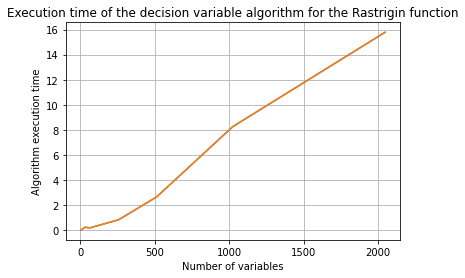

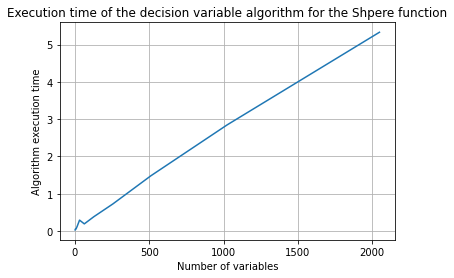

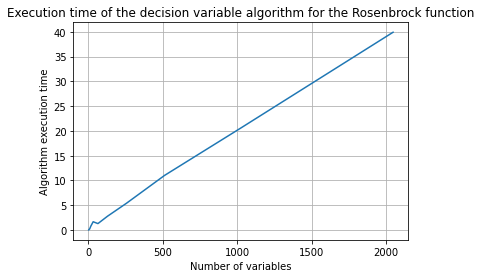

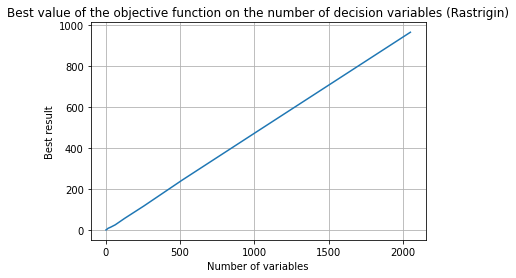

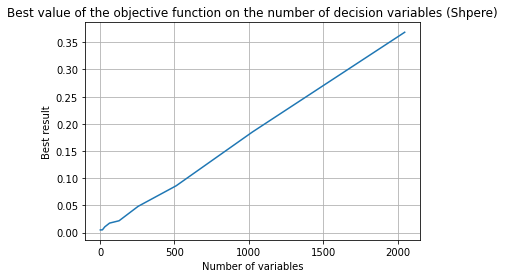

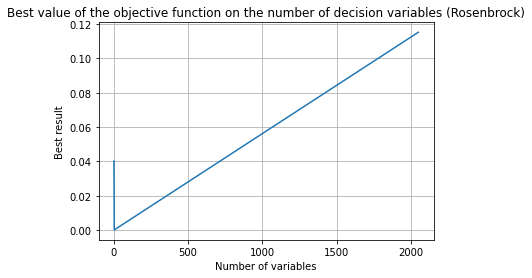

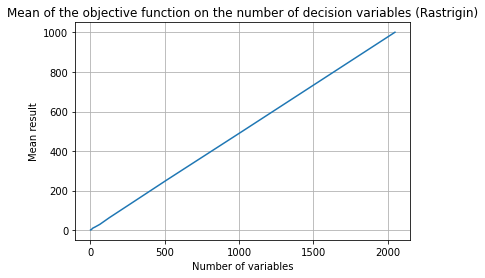

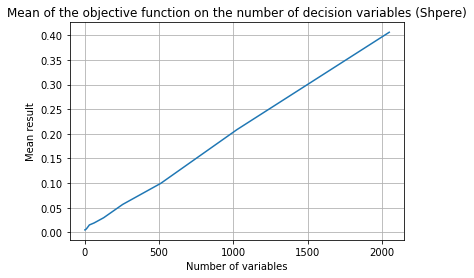

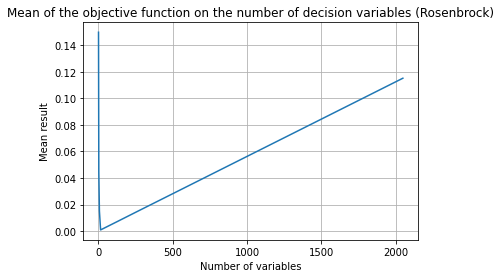

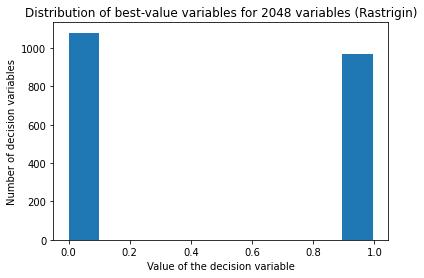

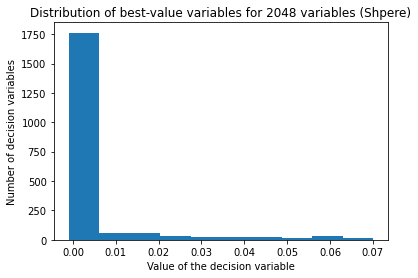

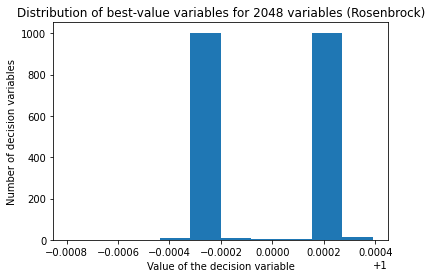

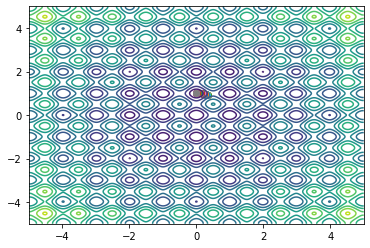

[3.42004442e-04 9.94958638e-01]


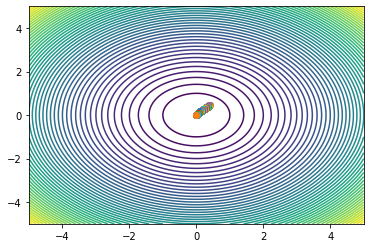

[0.00250116 0.01556856]


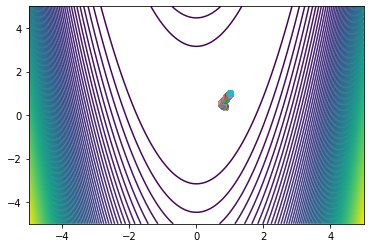

[0.99785264 0.99495297]


In [ ]:

mean_time_1=[[0] for i in range(11)]
mean_time_2=[[0] for i in range(11)]
mean_time_3=[[0] for i in range(11)]
for j in range(11):
  temp_sum_1=0
  temp_sum_2=0
  temp_sum_3=0
  for i in range(5):
    temp_sum_1=temp_sum_1+alg_time_1[j][i]
    temp_sum_2=temp_sum_2+alg_time_2[j][i]
    temp_sum_3=temp_sum_3+alg_time_3[j][i]
  mean_time_1[j]=temp_sum_1/5
  mean_time_2[j]=temp_sum_2/5
  mean_time_3[j]=temp_sum_3/5


hist1 = best_result_x1[10]
hist2 = best_result_x2[10]
hist3 = best_result_x3[10]

os_x=[[2**(i+1)] for i in range(11)]
plt.plot(os_x,mean_time_1)
plt.plot(os_x,mean_time_1)
plt.ylabel('Algorithm execution time')
plt.xlabel('Number of variables')
plt.title('Execution time of the decision variable algorithm for the Rastrigin function')
plt.grid()
plt.show()

plt.plot(os_x,mean_time_2)
plt.ylabel('Algorithm execution time')
plt.xlabel('Number of variables')
plt.title('Execution time of the decision variable algorithm for the Shpere function')
plt.grid()
plt.show()

plt.plot(os_x,mean_time_3)
plt.ylabel('Algorithm execution time')
plt.xlabel('Number of variables')
plt.title('Execution time of the decision variable algorithm for the Rosenbrock function')
plt.grid()
plt.show()

plt.plot(os_x,best_result_1)
plt.ylabel('Best result')
plt.xlabel('Number of variables')
plt.title('Best value of the objective function on the number of decision variables (Rastrigin)')
plt.grid()
plt.show()
plt.plot(os_x,best_result_2)
plt.ylabel('Best result')
plt.xlabel('Number of variables')
plt.title('Best value of the objective function on the number of decision variables (Shpere)')
plt.grid()
plt.show()
plt.plot(os_x,best_result_3)
plt.ylabel('Best result')
plt.xlabel('Number of variables')
plt.title('Best value of the objective function on the number of decision variables (Rosenbrock)')
plt.grid()
plt.show()

plt.plot(os_x,mean_1)
plt.ylabel('Mean result')
plt.xlabel('Number of variables')
plt.title('Mean of the objective function on the number of decision variables (Rastrigin)')
plt.grid()
plt.show()
plt.plot(os_x,mean_2)
plt.ylabel('Mean result')
plt.xlabel('Number of variables')
plt.title('Mean of the objective function on the number of decision variables (Shpere)')
plt.grid()
plt.show()
plt.plot(os_x,mean_3)
plt.ylabel('Mean result')
plt.xlabel('Number of variables')
plt.title('Mean of the objective function on the number of decision variables (Rosenbrock)')
plt.grid()
plt.show()

plt.hist(hist1)
plt.ylabel('Number of decision variables')
plt.xlabel('Value of the decision variable')
plt.title('Distribution of best-value variables for 2048 variables (Rastrigin)')
plt.show()
plt.hist(hist2)
plt.ylabel('Number of decision variables')
plt.xlabel('Value of the decision variable')
plt.title('Distribution of best-value variables for 2048 variables (Shpere)')
plt.show()
plt.hist(hist3)
plt.ylabel('Number of decision variables')
plt.xlabel('Value of the decision variable')
plt.title('Distribution of best-value variables for 2048 variables (Rosenbrock)')
plt.show()
rate = 0.0005
rho = 0.99
max_iters = 5000
rms_prop_draw(Rastrigin_grad,rastrigin,10 , 0, 0.02, max_iters, rate, rho)
rms_prop_draw(Sphere_grad,sphere,50 , 0, 0.001, max_iters, rate, rho)
rms_prop_draw(Rosenbrock_grad,rosenbrock,100 , 0.00001, 0, max_iters, rate, rho)